In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline 


In [2]:
inicio = datetime.datetime(2006, 1, 1)
fim = datetime.datetime(2016, 1, 1)

# Bank of America 
BAC = web.DataReader('BAC', 'stooq', start=inicio, end=fim)

# CityGroup
C = web.DataReader('C', 'stooq', start=inicio, end=fim)

# Goldman Socks
GS = web.DataReader('GS', 'stooq', start=inicio, end=fim)

# JPMorgan Chase
JPM = web.DataReader('JPM', 'stooq', start=inicio, end=fim)

# Morgan Stanley
MS = web.DataReader('MS', 'stooq', start=inicio, end=fim)

# Wells Fargo
WFC = web.DataReader('WFC', 'stooq', start=inicio, end=fim)


In [3]:
BAC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,14.7814,14.8325,14.6233,14.6233,5.417059e+07
2015-12-30,14.9473,14.9807,14.8070,14.8168,4.030734e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07


In [4]:
BAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2015-12-31 to 2006-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2517 non-null   float64
 1   High    2517 non-null   float64
 2   Low     2517 non-null   float64
 3   Close   2517 non-null   float64
 4   Volume  2516 non-null   float64
dtypes: float64(5)
memory usage: 118.0 KB


In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [7]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

# Análise exploratória de Dados

In [9]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [10]:
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick + 'Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


<AxesSubplot: xlabel='Date'>

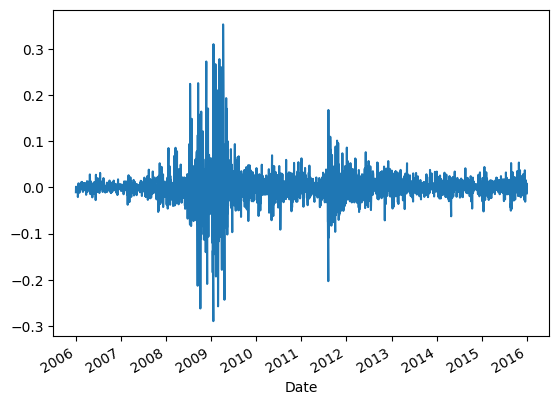

In [12]:
returns['BACReturn'].plot()

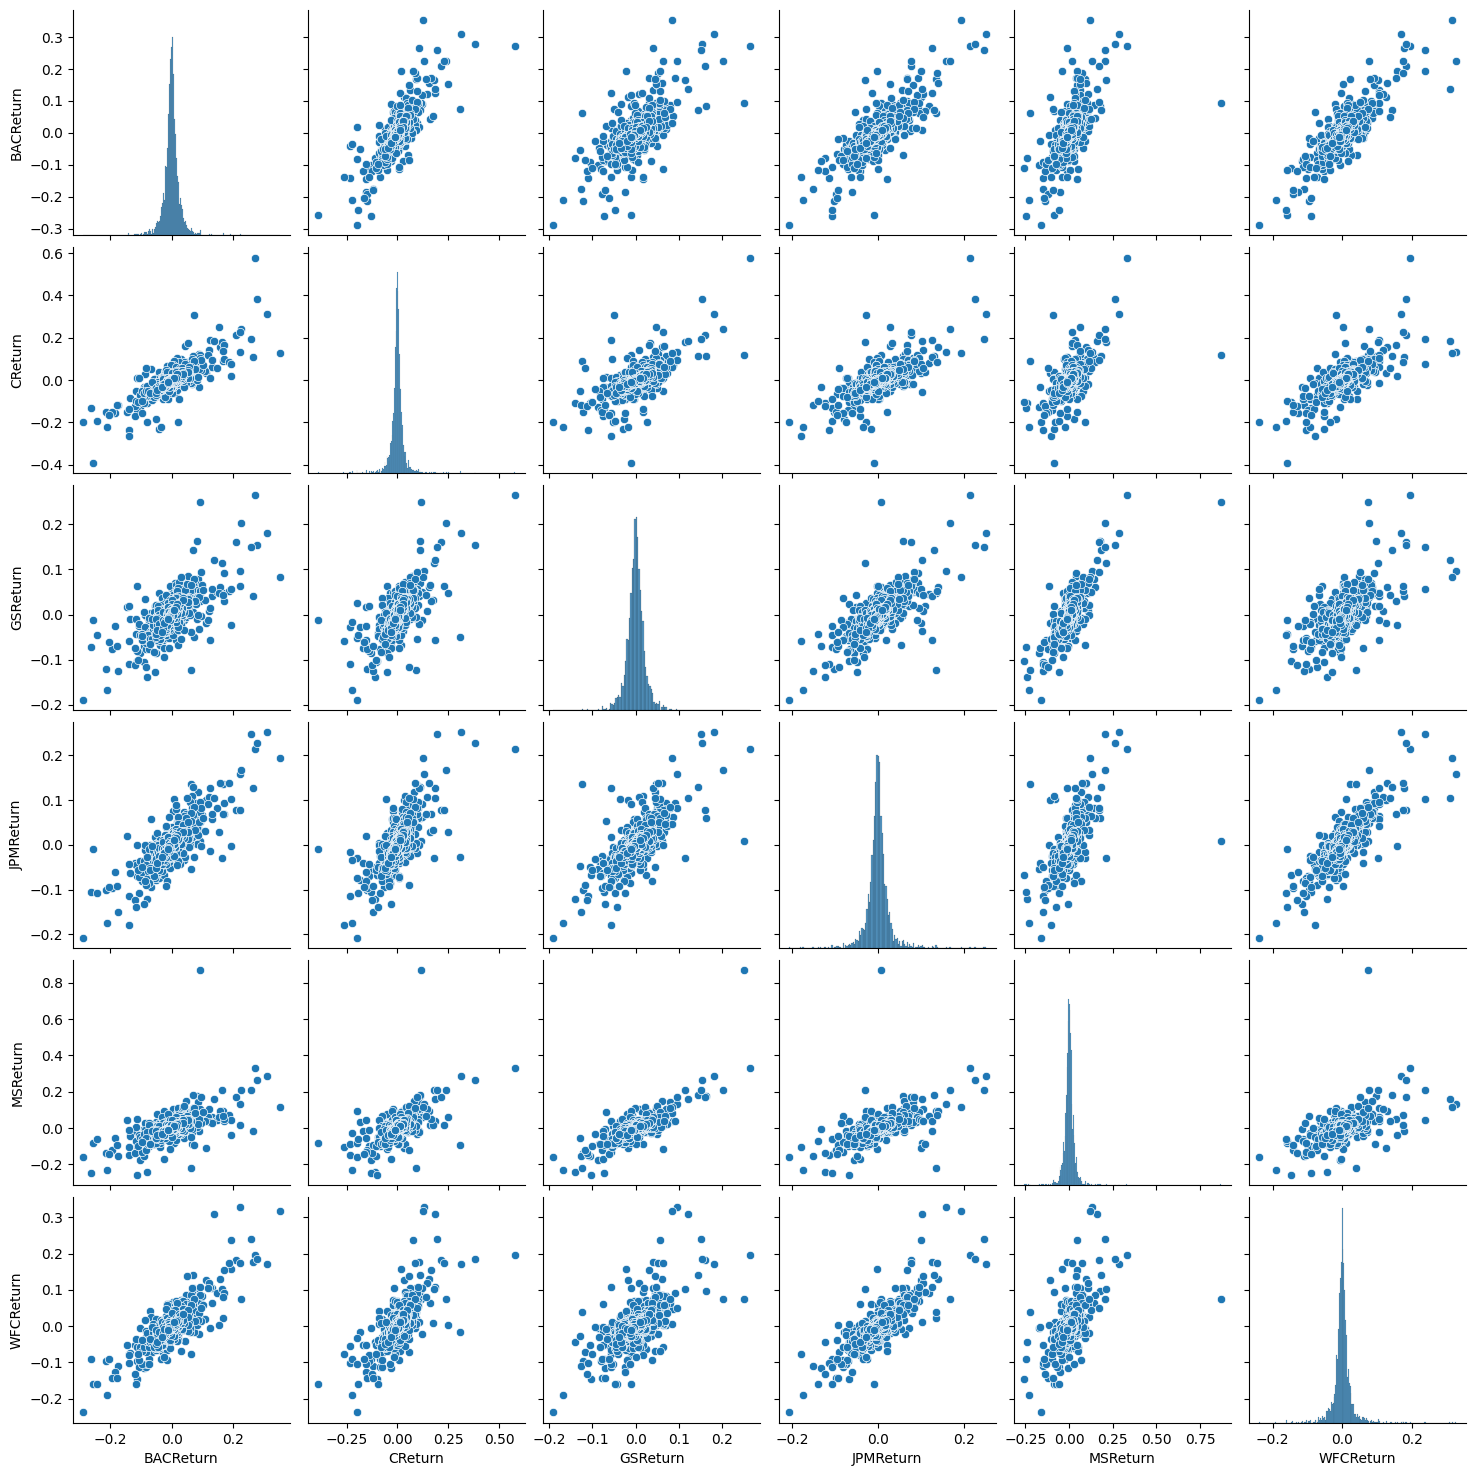

In [13]:
import seaborn as sns
sns.pairplot(returns[1:])

In [14]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [16]:
returns.std()

BACReturn    0.036605
CReturn      0.038615
GSReturn     0.025371
JPMReturn    0.027670
MSReturn     0.037708
WFCReturn    0.030221
dtype: float64

In [17]:
returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2016, 1, 1))].std()

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

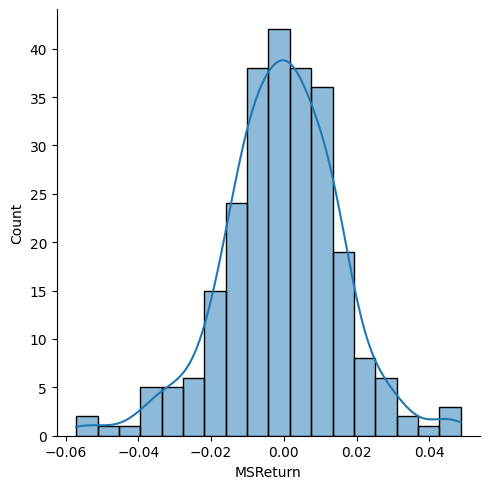

In [18]:
sns.displot(returns[(returns.index.date >= datetime.date(2015, 1, 1)) & (returns.index.date < datetime.date(2016, 1, 1))]['MSReturn'], kde='True')

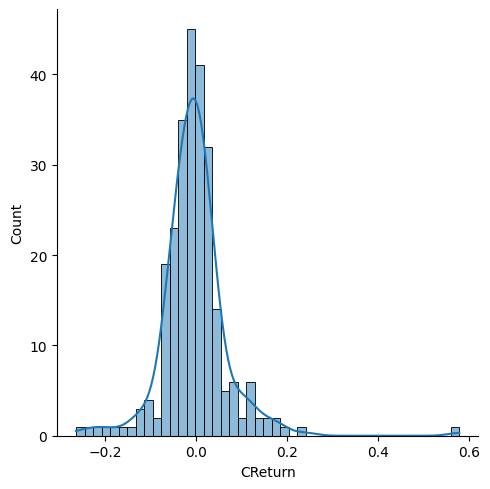

In [19]:
sns.displot(returns[(returns.index.date >= datetime.date(2008, 1, 1)) & (returns.index.date < datetime.date(2009, 1, 1))]['CReturn'], kde='True')

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

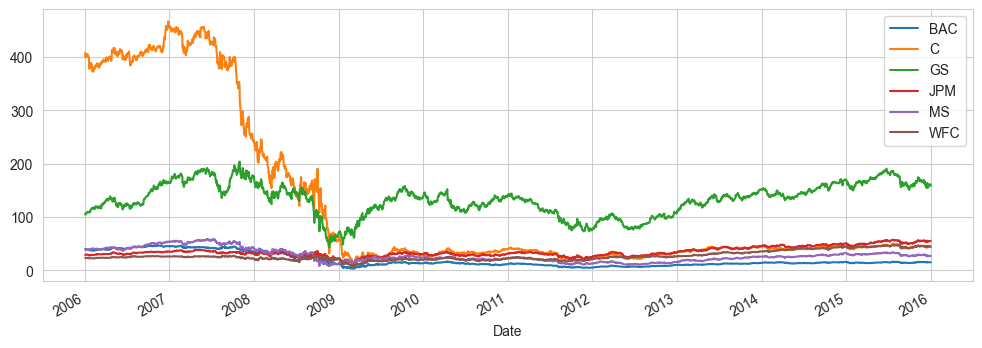

In [22]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4), label=tick)
plt.legend()

<AxesSubplot: xlabel='Date'>

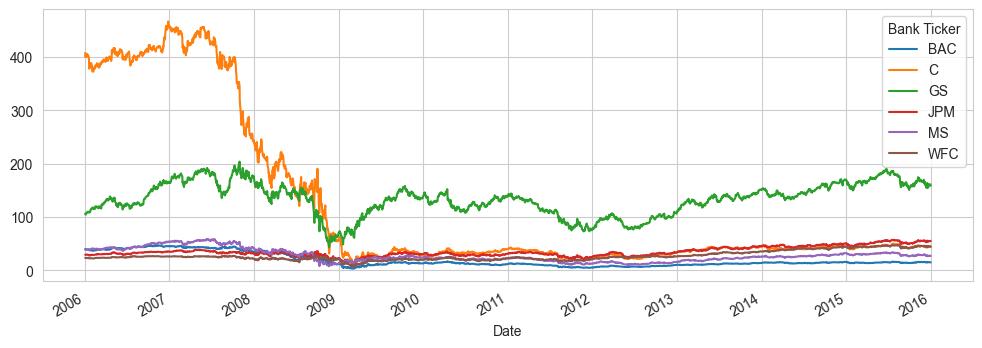

In [24]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).plot(figsize=(12, 4))

# Media Movel

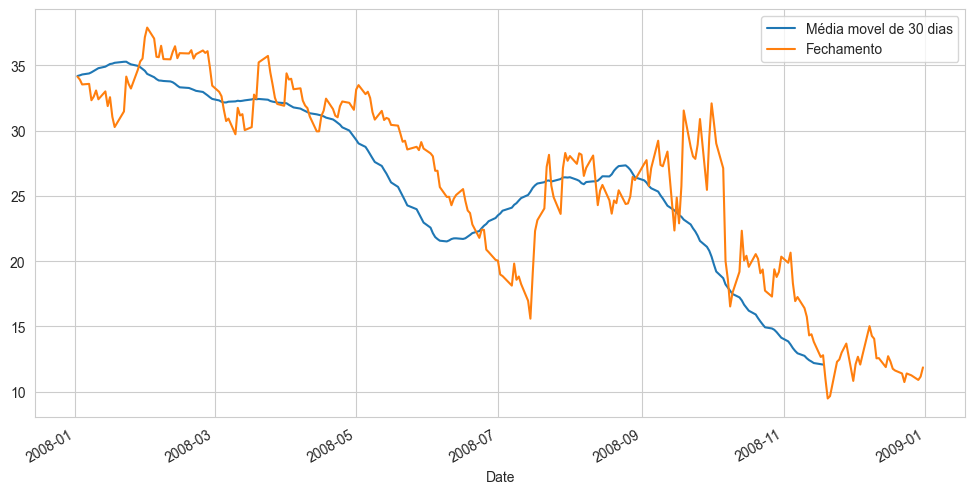

In [31]:
plt.figure(figsize=(12, 6))
BAC2008 = BAC['Close'][BAC.index.year == 2008]
BAC2008_media_movel = BAC2008.rolling(window=30).mean().plot(label= 'Média movel de 30 dias')
BAC2008.plot(label='Fechamento')
plt.legend()

In [35]:
corr_matrix = bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr()

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

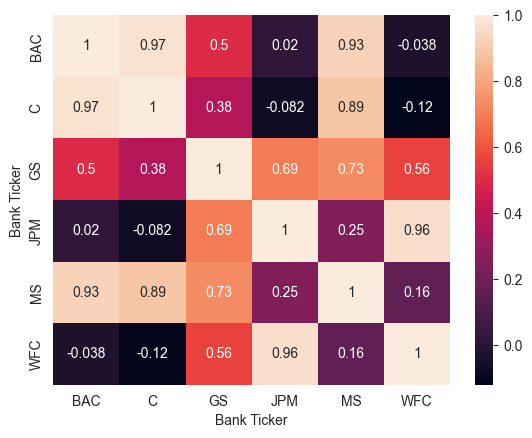

In [36]:
sns.heatmap(corr_matrix, annot=True)

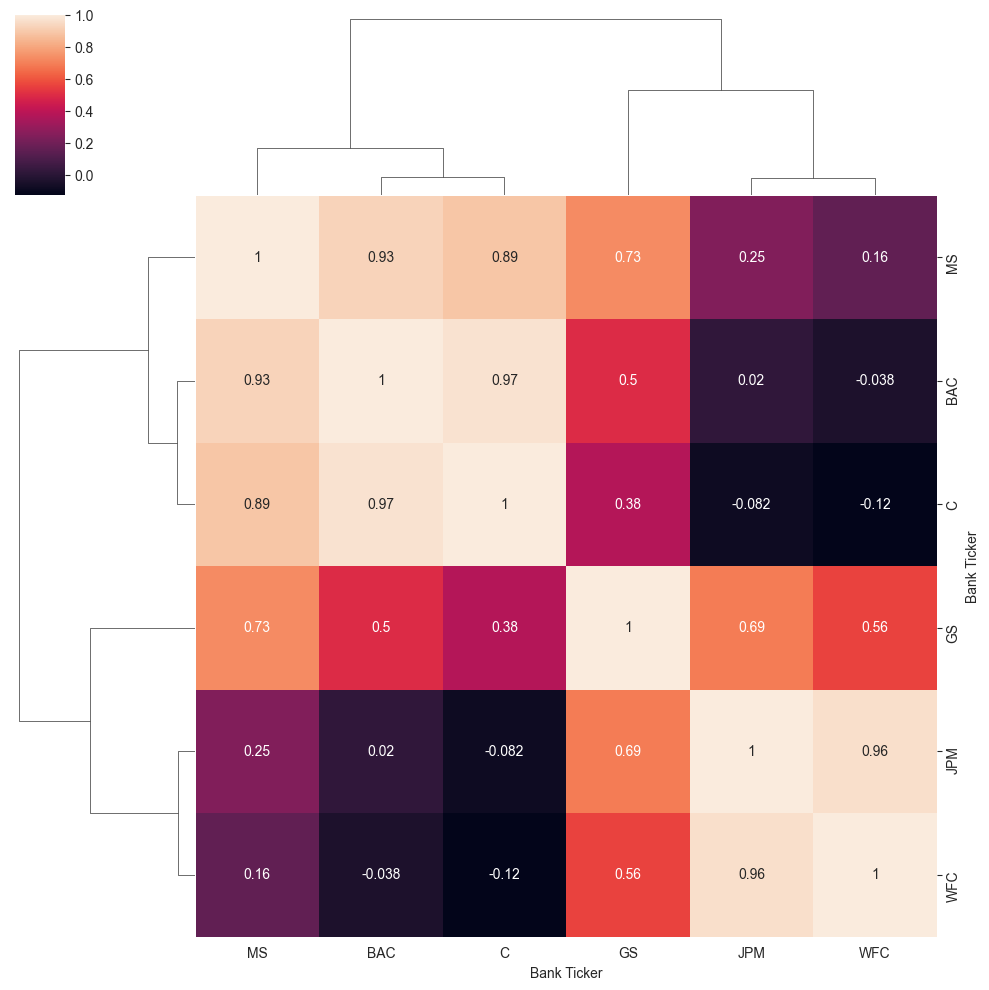

In [37]:
sns.clustermap(corr_matrix, annot=True)